In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

file_name1 = 'energy per capita.xlsx'
file_name2 = 'PPI data.xlsx'

df1 = pd.read_excel(file_name1)

df2 = pd.read_excel(file_name2)

In [ ]:
df1.head()

,Country,Year,energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP)
0,Afghanistan,1980,1.99,0.0
1,Afghanistan,1981,2.27,0.0
2,Afghanistan,1982,2.48,0.0
3,Afghanistan,1983,3.11,0.0
4,Afghanistan,1984,3.21,0.0


In [ ]:
# df1 is the DataFrame and replace to new country name to get aligned with PPI
country_name_mapping = {
    'Burma': 'Myanmar (Burma)',
    'NewZealand': 'New Zealand',
    'NorthKorea': 'North Korea',
    'PapuaNewGuinea':'Papua New Guinea',
    'SouthKorea':'South Korea',
    'CostaRica':'Costa Rica',
    'DominicanRepublic':'Dominican Republic',
    'ElSalvador':'El Salvador',
    'TrinidadandTobago':'Trinidad & Tobago',
    'BosniaandHerzegovina':'Bosnia & Herzegovina',
    'NorthMacedonia':'Macedonia',
    'Turkiye':'Turkey',
    'UnitedKingdom':'United Kingdom',
    'PalestinianTerritories':'Palestinian Territories',
    'SaudiArabia':'Saudi Arabia',
    'UnitedArabEmirates':'United Arab Emirates',
    'UnitedStates':'United States',
    'SriLanka':'Sri Lanka',
    'BurkinaFaso':'Burkina Faso',
    'CentralAfricanRepublic':'Central African Republic',
    'Congo-Brazzaville':'Congo - Brazzaville',
    'Congo-Kinshasa':'Congo - Kinshasa',
    "Coted'Ivoire":"Côte d’Ivoire",
    'EquatorialGuinea':'Equatorial Guinea',
    'Gambia,The':'Gambia',
    'SierraLeone':'Sierra Leone',
    'SouthAfrica':'South Africa',
    'SouthSudan':'South Sudan',
    'Eswatini':'Swaziland',
}

df1['Country'] = df1['Country'].replace(country_name_mapping)

In [ ]:
# Merge the DataFrames:
# 'Country' and 'Year' are the common columns
merged_df = pd.merge(df1, df2, on=['Country', 'Year'])

In [ ]:
# Export the merged DataFrame to a new Excel file on the desktop
merged_df.to_excel(r'merged_file.xlsx', index=False)

In [ ]:
print(merged_df.columns)

Index(['Country', 'Year', 'energy consumption per capita (MMBtu/person)',
       'energy consumption per GDP (1000 Btu/2015$ GDP PPP)', 'Region',
       'PPI Overall Score', 'Acceptance of the Rights of Others',
       'Equitable Distribution of Resources', 'Free Flow of Information',
       'Good Relations with Neighbours', 'High Levels of Human Capital',
       'Low Levels of Corruption', 'Sound Business Environment',
       'Well-Functioning Government', 'ARO: Exclusion by socio-economic group',
       'ARO: Gender Inequality', 'ARO: Group grievance',
       'EDR: Access to public Services', 'EDR: Equality of opportunity',
       'EDR: Inequality-adjusted life expectancy', 'FFI: Freedom of the Press',
       'FFI: Individuals using the Internet', 'FFI: Quality of information',
       'GRN: External Intervention', 'GRN: International tourism',
       'GRN: Law to support equal treatment of population segments',
       'HLHC: Healthy life expectancy (HALE)', 'HLHC: Researchers in R&D'

In [ ]:
# Calculate the correlation matrix
correlation_matrix = merged_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                                        Year  \
Year                                                1.000000   
energy consumption per capita (MMBtu/person)       -0.003761   
energy consumption per GDP (1000 Btu/2015$ GDP ... -0.055697   
PPI Overall Score                                  -0.025775   
Acceptance of the Rights of Others                 -0.021557   
Equitable Distribution of Resources                -0.038571   
Free Flow of Information                           -0.111979   
Good Relations with Neighbours                     -0.047564   
High Levels of Human Capital                        0.008678   
Low Levels of Corruption                            0.021025   
Sound Business Environment                         -0.021223   
Well-Functioning Government                        -0.004308   
ARO: Exclusion by socio-economic group              0.011112   
ARO: Gender Inequality                             -0.078384   
ARO: Group grievance                    

In [ ]:
ppi_columns = ['PPI Overall Score', 'Acceptance of the Rights of Others', 'Equitable Distribution of Resources',
               'Free Flow of Information', 'Good Relations with Neighbours', 'High Levels of Human Capital',
               'Low Levels of Corruption', 'Sound Business Environment', 'Well-Functioning Government',
               'ARO: Exclusion by socio-economic group', 'ARO: Gender Inequality', 'ARO: Group grievance',
               'EDR: Access to public Services', 'EDR: Equality of opportunity', 'EDR: Inequality-adjusted life expectancy',
               'FFI: Freedom of the Press', 'FFI: Individuals using the Internet', 'FFI: Quality of information',
               'GRN: External Intervention', 'GRN: International tourism', 'GRN: Law to support equal treatment of population segments',
               'HLHC: Healthy life expectancy (HALE)', 'HLHC: Researchers in R&D', 'HLHC: Share of youth not in employment, education or training (NEET)',
               'LLC: Control of corruption', 'LLC: Factionalised elites', 'LLC: Public sector theft',
               'SBE: Financial Institutions Index', 'SBE: GDP per capita', 'SBE: Regulatory Quality',
               'WFG:Government effectiveness', 'WFG:Government openness and transaparency', 'WFG:Rule of law']

# Create scatter plots again for 'total energy consumption' vs each PPI-related column
plt.figure(figsize=(18, 50))

for i, ppi_column in enumerate(ppi_columns, start=1):
    plt.subplot(9, 4, i)
    plt.scatter(merged_df['energy consumption per capita (MMBtu/person)'], merged_df[ppi_column], alpha=0.5)

    # Add a regression line
    slope, intercept = np.polyfit(merged_df['energy consumption per capita (MMBtu/person)'], merged_df[ppi_column], 1)
    plt.plot(merged_df['energy consumption per capita (MMBtu/person)'], slope * merged_df['energy consumption per capita (MMBtu/person)'] + intercept, color='red', linewidth=2)

    plt.title(f'{ppi_column}')
    plt.xlabel('Energy Consumption per Capita (MMBtu/person)')
    plt.ylabel(ppi_column)

plt.tight_layout()
plt.show()

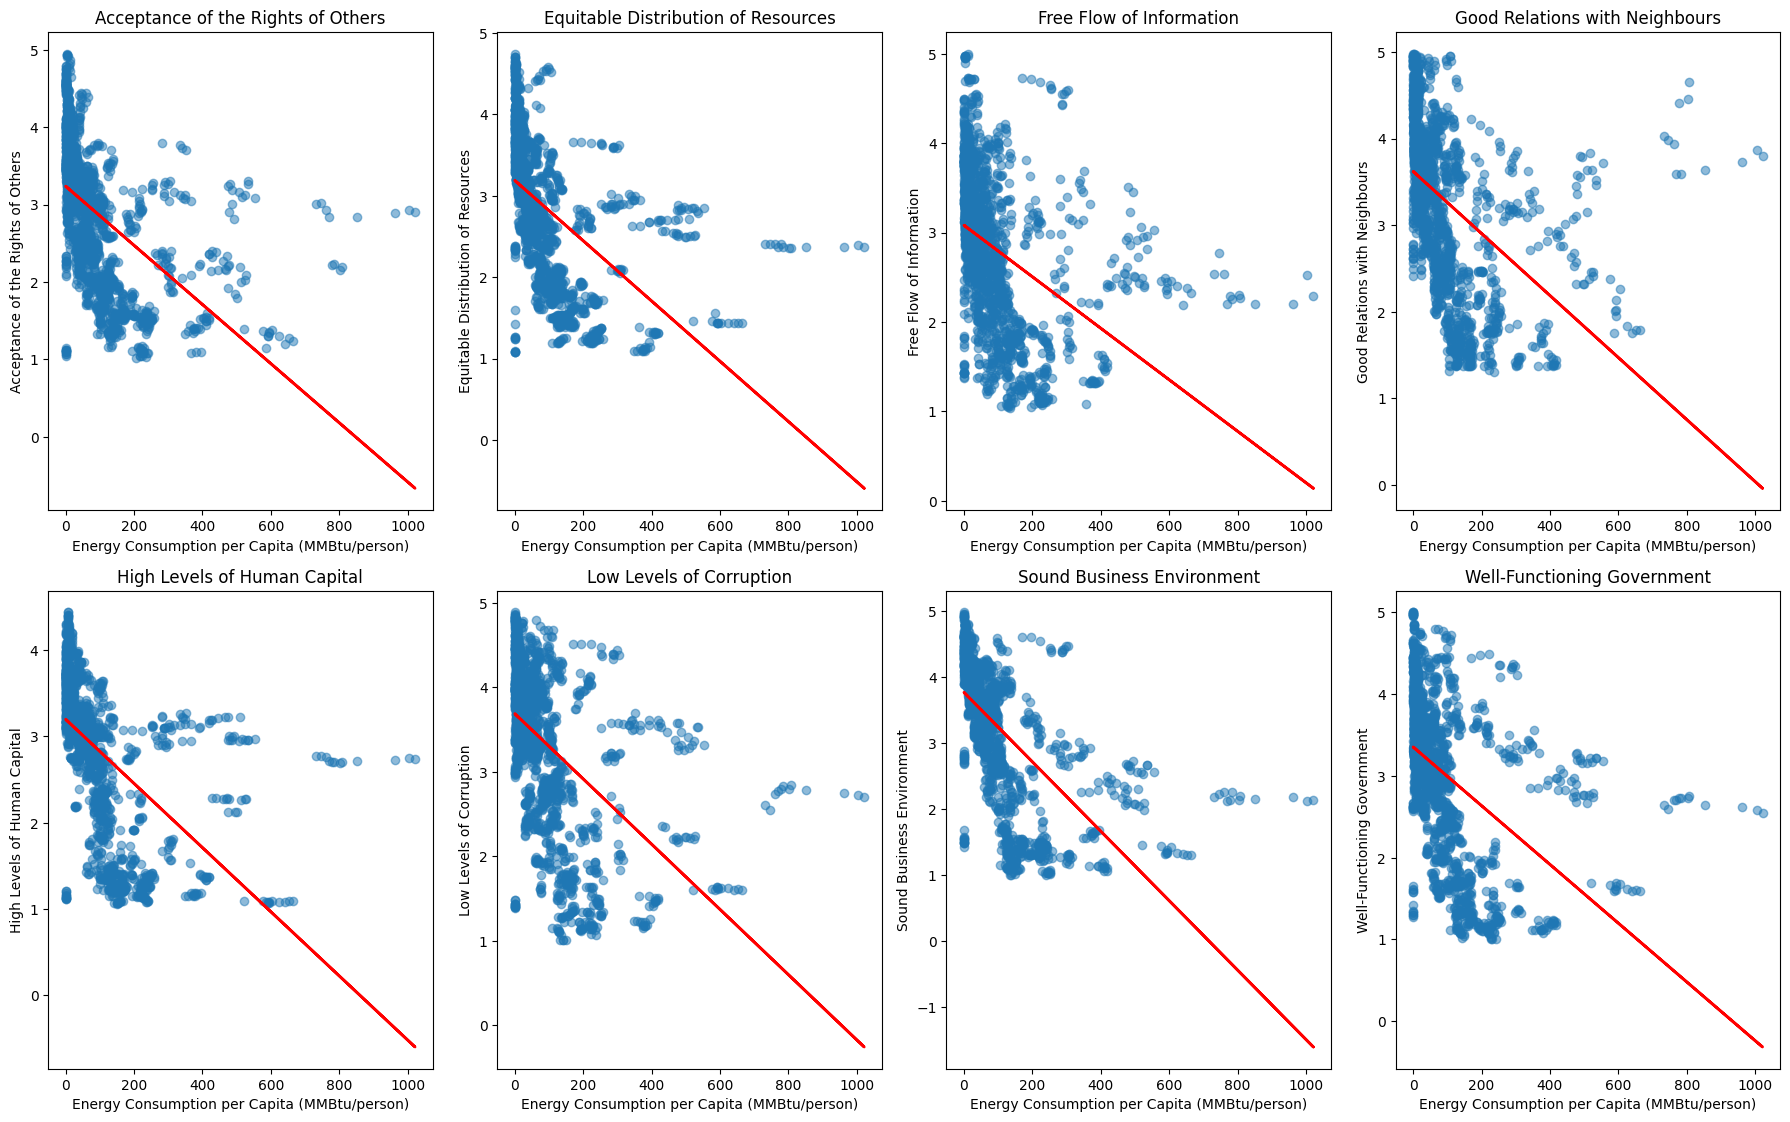

In [ ]:
ppi_eightpillars = ['Acceptance of the Rights of Others', 'Equitable Distribution of Resources',
               'Free Flow of Information', 'Good Relations with Neighbours', 'High Levels of Human Capital',
               'Low Levels of Corruption', 'Sound Business Environment', 'Well-Functioning Government']

# Create scatter plots again for 'total energy consumption' vs each PPI-related column
plt.figure(figsize=(18, 50))

for i, ppi_eightpillars in enumerate(ppi_eightpillars, start=1):
    plt.subplot(9, 4, i)
    plt.scatter(merged_df['energy consumption per capita (MMBtu/person)'], merged_df[ppi_eightpillars], alpha=0.5)

    # Add a regression line
    slope, intercept = np.polyfit(merged_df['energy consumption per capita (MMBtu/person)'], merged_df[ppi_eightpillars], 1)
    plt.plot(merged_df['energy consumption per capita (MMBtu/person)'], slope * merged_df['energy consumption per capita (MMBtu/person)'] + intercept, color='red', linewidth=2)

    plt.title(f'{ppi_eightpillars}')
    plt.xlabel('Energy Consumption per Capita (MMBtu/person)')
    plt.ylabel(ppi_eightpillars)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = merged_df[ppi_columns].corrwith(merged_df['energy consumption per capita (MMBtu/person)'])

# Sort correlations from highest to lowest
sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

# Display the sorted correlations
print("Correlations with Energy Consumption per Capita:")
print(sorted_correlations)

Correlations with Energy Consumption per Capita:
SBE: GDP per capita                                                     0.715136
Sound Business Environment                                              0.620699
FFI: Individuals using the Internet                                     0.585147
WFG:Government effectiveness                                            0.568811
EDR: Access to public Services                                          0.556008
WFG:Rule of law                                                         0.545126
LLC: Control of corruption                                              0.540695
EDR: Inequality-adjusted life expectancy                                0.535257
PPI Overall Score                                                       0.533654
GRN: External Intervention                                              0.532004
High Levels of Human Capital                                            0.531446
ARO: Gender Inequality                                      

In [ ]:
# Specify the columns of interest
columns_of_interest = ['Acceptance of the Rights of Others', 'Equitable Distribution of Resources',
                       'Free Flow of Information', 'Good Relations with Neighbours',
                       'High Levels of Human Capital', 'Low Levels of Corruption',
                       'Sound Business Environment', 'Well-Functioning Government']

# Filter columns of interest
socioeconomic_columns = [col for col in columns_of_interest if col in merged_df.columns]

# Calculate the correlation matrix for columns of interest
correlation_matrix = merged_df[socioeconomic_columns].corrwith(merged_df['energy consumption per capita (MMBtu/person)'])

# Sort correlations from highest to lowest
sorted_correlations = correlation_matrix.abs().sort_values(ascending=False)

# Display the sorted correlations
print("Correlations with Energy Consumption per Capita:")
print(sorted_correlations)

Correlations with Energy Consumption per Capita:
Sound Business Environment             0.620699
High Levels of Human Capital           0.531446
Equitable Distribution of Resources    0.506838
Acceptance of the Rights of Others     0.504389
Low Levels of Corruption               0.492004
Good Relations with Neighbours         0.456166
Well-Functioning Government            0.452129
Free Flow of Information               0.405547
dtype: float64


In [ ]:
# Specify the columns of interest
columns_of_interest = ['Acceptance of the Rights of Others', 'Equitable Distribution of Resources',
                       'Free Flow of Information', 'Good Relations with Neighbours',
                       'High Levels of Human Capital', 'Low Levels of Corruption',
                       'Sound Business Environment', 'Well-Functioning Government']

# Filter columns of interest
socioeconomic_columns = [col for col in columns_of_interest if col in merged_df.columns]

# Initialize a dictionary to store correlations by year
yearly_correlations = {}

# Calculate correlations for each year
for year in merged_df['Year'].unique():
    # Filter data for the current year
    year_data = merged_df[merged_df['Year'] == year]
    # Calculate the correlation matrix for columns of interest
    correlation_matrix = year_data[socioeconomic_columns].corrwith(year_data['energy consumption per capita (MMBtu/person)'])
    # Store correlations for the current year
    yearly_correlations[year] = correlation_matrix

# Display correlations for each year
for year, correlations in yearly_correlations.items():
    print(f"Correlations with Energy Consumption per Capita for Year {year}:")
    print(correlations)
    print()

Correlations with Energy Consumption per Capita for Year 2009:
Acceptance of the Rights of Others    -0.533753
Equitable Distribution of Resources   -0.545567
Free Flow of Information              -0.425705
Good Relations with Neighbours        -0.462138
High Levels of Human Capital          -0.543022
Low Levels of Corruption              -0.530457
Sound Business Environment            -0.649958
Well-Functioning Government           -0.494592
dtype: float64

Correlations with Energy Consumption per Capita for Year 2010:
Acceptance of the Rights of Others    -0.536573
Equitable Distribution of Resources   -0.550767
Free Flow of Information              -0.441456
Good Relations with Neighbours        -0.480636
High Levels of Human Capital          -0.555134
Low Levels of Corruption              -0.534775
Sound Business Environment            -0.657409
Well-Functioning Government           -0.494085
dtype: float64

Correlations with Energy Consumption per Capita for Year 2011:
Acceptance 

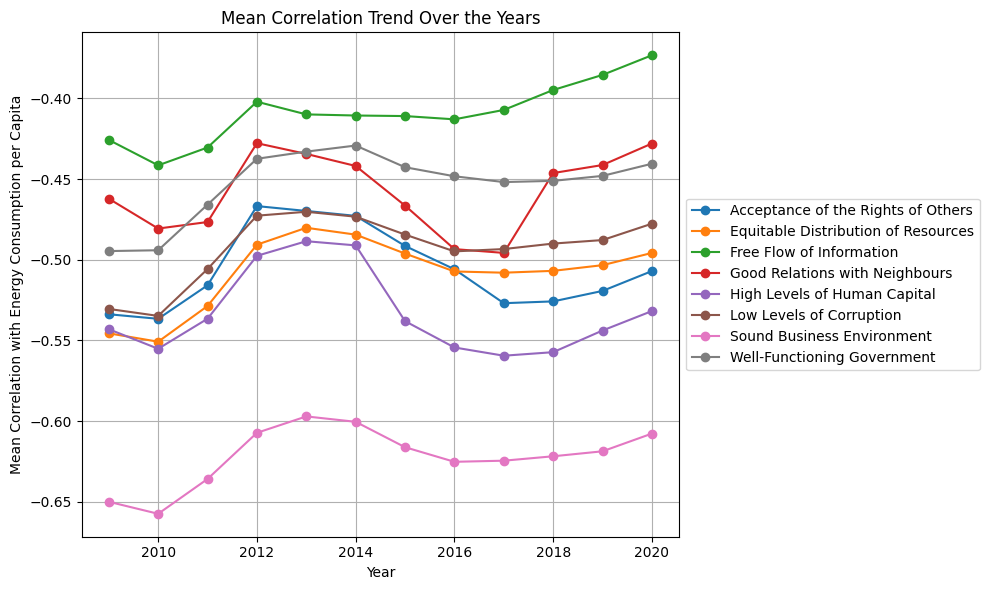

In [ ]:
# Specify the columns of interest
columns_of_interest = ['Acceptance of the Rights of Others', 'Equitable Distribution of Resources',
                       'Free Flow of Information', 'Good Relations with Neighbours',
                       'High Levels of Human Capital', 'Low Levels of Corruption',
                       'Sound Business Environment', 'Well-Functioning Government']

# Filter columns of interest
socioeconomic_columns = [col for col in columns_of_interest if col in merged_df.columns]

# Initialize empty lists to store years and corresponding mean correlations for each column
years = []
mean_correlations = {col: [] for col in socioeconomic_columns}

# Calculate mean correlations for each year and each column
for year in merged_df['Year'].unique():
    # Filter data for the current year
    year_data = merged_df[merged_df['Year'] == year]
    # Calculate the correlation matrix for columns of interest
    correlation_matrix = year_data[socioeconomic_columns].corrwith(year_data['energy consumption per capita (MMBtu/person)'])
    # Store mean correlations for each column
    for col in socioeconomic_columns:
        mean_corr = correlation_matrix[col].mean()
        mean_correlations[col].append(mean_corr)
    # Append year to the years list
    years.append(year)

# Plotting
plt.figure(figsize=(10, 6))
for col in socioeconomic_columns:
    plt.plot(years, mean_correlations[col], marker='o', linestyle='-', label=col)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Mean Correlation with Energy Consumption per Capita')
plt.title('Mean Correlation Trend Over the Years')

# Move legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

Correlation Analysis based on Region breakdown

In [ ]:
from scipy.stats import pearsonr

# Get unique regions in the dataset
regions = merged_df['Region'].unique()

# Perform correlation analysis for each region
for region in regions:
    region_data = merged_df[merged_df['Region'] == region]
    energy_consumption = region_data['energy consumption per capita (MMBtu/person)']
    ppi_scores = region_data['PPI Overall Score']

    # Calculate Pearson's correlation coefficient and p-value
    correlation_coefficient, p_value = pearsonr(energy_consumption, ppi_scores)

    print(f'Region: {region}')
    print(f"Pearson's r correlation coefficient: {correlation_coefficient}")
    print(f"Pearson's p-value: {p_value}")
    print()


Region: South Asia
Pearson's r correlation coefficient: -0.7277927786303034
Pearson's p-value: 4.418412685519035e-15

Region: Europe
Pearson's r correlation coefficient: -0.6369052045085681
Pearson's p-value: 1.5804536833617024e-50

Region: MENA
Pearson's r correlation coefficient: -0.5805752503248851
Pearson's p-value: 5.0197938941281445e-23

Region: sub-Saharan Africa
Pearson's r correlation coefficient: -0.46753781714277365
Pearson's p-value: 4.95979825829042e-30

Region: South America
Pearson's r correlation coefficient: -0.21555796813367292
Pearson's p-value: 0.013054773973349155

Region: Russia and Eurasia
Pearson's r correlation coefficient: 0.0543024060421893
Pearson's p-value: 0.5180029556078225

Region: Asia-Pacific
Pearson's r correlation coefficient: -0.7777017920483625
Pearson's p-value: 1.8628461519736319e-47

Region: North America
Pearson's r correlation coefficient: -0.9489806322445608
Pearson's p-value: 1.657787656986159e-12

Region: Central America And Caribbean
Pears

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table (cross-tabulation) between energy consumption and region
contingency_table = pd.crosstab(merged_df['energy consumption per capita (MMBtu/person)'], merged_df['Region'])

# Perform the chi-square test
chi2, p_value, _, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square test statistic:", chi2)
print("Chi-Square p-value:", p_value)
print("\nExpected counts (by region):")
print(expected)

Chi-Square test statistic: 14843.877550251891
Chi-Square p-value: 3.726163163844139e-07

Expected counts (by region):
[[3.14723926 1.98773006 5.96319018 ... 1.82208589 1.1595092  7.28834356]
 [0.11656442 0.07361963 0.2208589  ... 0.06748466 0.04294479 0.26993865]
 [0.11656442 0.07361963 0.2208589  ... 0.06748466 0.04294479 0.26993865]
 ...
 [0.11656442 0.07361963 0.2208589  ... 0.06748466 0.04294479 0.26993865]
 [0.11656442 0.07361963 0.2208589  ... 0.06748466 0.04294479 0.26993865]
 [0.11656442 0.07361963 0.2208589  ... 0.06748466 0.04294479 0.26993865]]


In [ ]:
from scipy.stats import f_oneway

# Get unique regions in the dataset
regions = merged_df['Region'].unique()

# Create an empty list to store energy consumption data for each region
energy_consumption_by_region = []

# Populate the list with energy consumption data for each region
for region in regions:
    energy_consumption_region = merged_df[merged_df['Region'] == region]['energy consumption per capita (MMBtu/person)']
    energy_consumption_by_region.append(energy_consumption_region)

# Perform ANOVA
f_statistic, p_value = f_oneway(*energy_consumption_by_region)

# Print results
print("ANOVA F-statistic:", f_statistic)
print("ANOVA p-value:", p_value)

ANOVA F-statistic: 103.26934663424952
ANOVA p-value: 1.195103742343463e-143


Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

data = pd.read_csv('merged_file.csv')

data.head()

,Country,Year,energy consumption per capita (MMBtu/person),energy consumption per GDP (1000 Btu/2015$ GDP PPP),Region,PPI Overall Score,Acceptance of the Rights of Others,Equitable Distribution of Resources,Free Flow of Information,Good Relations with Neighbours,...,"HLHC: Share of youth not in employment, education or training (NEET)",LLC: Control of corruption,LLC: Factionalised elites,LLC: Public sector theft,SBE: Financial Institutions Index,SBE: GDP per capita,SBE: Regulatory Quality,WFG:Government effectiveness,WFG:Government openness and transaparency,WFG:Rule of law
0,Afghanistan,2009,3.21,1.69,South Asia,4.288,4.406,4.206,3.534,4.618,...,1.715416,4.800451,4.600000,4.777283,4.595052,4.974176,4.286328,4.348948,5.0,4.488878
1,Afghanistan,2010,3.90,2.00,South Asia,4.292,4.420,4.206,3.527,4.618,...,1.715416,4.898959,4.733333,4.777283,4.595052,4.960845,4.155410,4.322684,5.0,4.487364
2,Afghanistan,2011,4.76,2.36,South Asia,4.269,4.349,4.117,3.512,4.618,...,1.715416,4.843770,4.733333,4.777283,4.595052,4.954782,4.162560,4.317114,5.0,4.534173
3,Afghanistan,2012,4.42,2.07,South Asia,4.236,4.347,4.111,3.505,4.620,...,1.715416,4.688297,4.733333,5.000000,4.546449,4.948358,3.840963,4.237692,5.0,4.302423
4,Afghanistan,2013,3.54,1.61,South Asia,4.176,4.300,3.926,3.498,4.619,...,1.715416,4.704766,4.733333,4.412621,4.549718,4.948954,3.840981,4.259977,5.0,4.260501


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 38 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Country                                                               1956 non-null   object 
 1   Year                                                                  1956 non-null   int64  
 2   energy consumption per capita (MMBtu/person)                          1956 non-null   float64
 3   energy consumption per GDP (1000 Btu/2015$ GDP PPP)                   1956 non-null   float64
 4   Region                                                                1956 non-null   object 
 5   PPI Overall Score                                                     1956 non-null   float64
 6   Acceptance of the Rights of Others                                    1956 non-null   float64
 7

In [ ]:
# Drop the 'Country' and 'Region' columns
data = data.drop([
                  'Country', 'Region','energy consumption per GDP (1000 Btu/2015$ GDP PPP)','PPI Overall Score','Acceptance of the Rights of Others',
                  'Equitable Distribution of Resources', 'Free Flow of Information', 'Good Relations with Neighbours', 'High Levels of Human Capital',
                  'Low Levels of Corruption', 'Sound Business Environment', 'Well-Functioning Government'
                  ], axis=1)

# Map 'energy consumption per capita (MMBtu/person)' to binary values based on a threshold
data['energy consumption per capita (MMBtu/person)'] = (data['energy consumption per capita (MMBtu/person)'] <= 42.850000).astype(int)

# Move 'energy consumption per capita (MMBtu/person)' column to the left-end side
ppi_score_column = data['energy consumption per capita (MMBtu/person)']
data.drop(labels=['energy consumption per capita (MMBtu/person)'], axis=1, inplace=True)
data.insert(0, 'energy consumption per capita (MMBtu/person)', ppi_score_column)

data.head()

,energy consumption per capita (MMBtu/person),Year,ARO: Exclusion by socio-economic group,ARO: Gender Inequality,ARO: Group grievance,EDR: Access to public Services,EDR: Equality of opportunity,EDR: Inequality-adjusted life expectancy,FFI: Freedom of the Press,FFI: Individuals using the Internet,...,"HLHC: Share of youth not in employment, education or training (NEET)",LLC: Control of corruption,LLC: Factionalised elites,LLC: Public sector theft,SBE: Financial Institutions Index,SBE: GDP per capita,SBE: Regulatory Quality,WFG:Government effectiveness,WFG:Government openness and transaparency,WFG:Rule of law
0,1,2009,3.704225,4.743658,4.822222,3.972465,4.0,4.727128,2.579605,4.847949,...,1.715416,4.800451,4.600000,4.777283,4.595052,4.974176,4.286328,4.348948,5.0,4.488878
1,1,2010,3.704225,4.743658,4.866667,3.972465,4.0,4.727128,2.579605,4.828675,...,1.715416,4.898959,4.733333,4.777283,4.595052,4.960845,4.155410,4.322684,5.0,4.487364
2,1,2011,3.704225,4.700935,4.688889,3.972465,4.0,4.428098,2.579605,4.785844,...,1.715416,4.843770,4.733333,4.777283,4.595052,4.954782,4.162560,4.317114,5.0,4.534173
3,1,2012,3.704225,4.652870,4.733333,3.972465,4.0,4.407075,2.579605,4.766376,...,1.715416,4.688297,4.733333,5.000000,4.546449,4.948358,3.840963,4.237692,5.0,4.302423
4,1,2013,3.699892,4.599466,4.644444,3.972465,4.0,3.784023,2.579605,4.747296,...,1.715416,4.704766,4.733333,4.412621,4.549718,4.948954,3.840981,4.259977,5.0,4.260501


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   energy consumption per capita (MMBtu/person)                          1956 non-null   int64  
 1   Year                                                                  1956 non-null   int64  
 2   ARO: Exclusion by socio-economic group                                1956 non-null   float64
 3   ARO: Gender Inequality                                                1956 non-null   float64
 4   ARO: Group grievance                                                  1956 non-null   float64
 5   EDR: Access to public Services                                        1956 non-null   float64
 6   EDR: Equality of opportunity                                          1956 non-null   float64
 7

In [ ]:
data.describe()

,energy consumption per capita (MMBtu/person),Year,ARO: Exclusion by socio-economic group,ARO: Gender Inequality,ARO: Group grievance,EDR: Access to public Services,EDR: Equality of opportunity,EDR: Inequality-adjusted life expectancy,FFI: Freedom of the Press,FFI: Individuals using the Internet,...,"HLHC: Share of youth not in employment, education or training (NEET)",LLC: Control of corruption,LLC: Factionalised elites,LLC: Public sector theft,SBE: Financial Institutions Index,SBE: GDP per capita,SBE: Regulatory Quality,WFG:Government effectiveness,WFG:Government openness and transaparency,WFG:Rule of law
count,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,...,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000,1956.000000
mean,0.500000,2014.500000,2.698857,2.765380,3.312003,2.961794,3.112474,2.493867,2.436083,3.115426,...,2.598497,3.467195,3.420627,3.185825,3.471435,3.756812,2.812113,3.107297,3.107975,2.952170
std,0.500128,3.452935,1.168101,1.038756,0.927694,0.901882,0.994680,1.083115,0.853474,1.293242,...,0.892385,0.981541,1.098894,0.914072,0.964342,1.392803,0.931153,0.902382,1.303742,0.919037
min,0.000000,2009.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2011.750000,1.663055,1.822430,2.600000,2.343944,2.000000,1.648812,1.944168,1.917122,...,1.876519,2.977956,2.588889,2.570898,2.937344,3.067622,2.183949,2.553861,2.000000,2.349078
50%,0.500000,2014.500000,2.681473,2.983979,3.355556,3.010505,3.000000,2.241931,2.249203,3.215384,...,2.430832,3.710109,3.711111,3.394061,3.611039,4.400042,2.913553,3.228093,3.000000,3.144053
75%,1.000000,2017.250000,3.552546,3.623498,4.022222,3.647143,4.000000,3.403470,2.842387,4.339470,...,3.196604,4.157083,4.244444,3.822866,4.296229,4.846948,3.464811,3.736743,4.000000,3.603158
max,1.000000,2020.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
# Count the values of 'energy consumption per capita (MMBtu/person)' column
score_counts = data['energy consumption per capita (MMBtu/person)'].value_counts()

print(score_counts)

1    978
0    978
Name: energy consumption per capita (MMBtu/person), dtype: int64


In [ ]:
# Split Train and Test
train, test = train_test_split(data, test_size=0.2, random_state=30)

# Separate features (X) and target variable (y) for training set
x_train = train.drop(['energy consumption per capita (MMBtu/person)'], axis=1)
y_train = train['energy consumption per capita (MMBtu/person)']

# Separate features (X) and target variable (y) for testing set
x_test = test.drop(['energy consumption per capita (MMBtu/person)'], axis=1)
y_test = test['energy consumption per capita (MMBtu/person)']

print(len(train), len(test))

1564 392


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  # Import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier  # Import GradientBoostingClassifier
from sklearn.metrics import accuracy_score  # Import accuracy_score for evaluating model performance
from sklearn.model_selection import KFold, cross_val_score  # Import KFold and cross_val_score for cross-validation


In [ ]:
# SVM

model = SVC(gamma='scale')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test)*100))

SVM: 46.17


In [ ]:
#KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('KNeighborsClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test)*100))

KNeighborsClassifier: 94.90


In [ ]:
# Gradient Boosting

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Gradient Boosting: %.2f' % (metrics.accuracy_score(y_pred, y_test)*100))

Gradient Boosting: 97.19


In [ ]:
# Compute Feature Importances

features = pd.Series(
    model.feature_importances_,
    index=x_train.columns
).sort_values(ascending=False)

print(features)

SBE: GDP per capita                                                     0.571595
HLHC: Researchers in R&D                                                0.090848
ARO: Gender Inequality                                                  0.073194
HLHC: Share of youth not in employment, education or training (NEET)    0.049286
HLHC: Healthy life expectancy (HALE)                                    0.039679
GRN: International tourism                                              0.022732
ARO: Exclusion by socio-economic group                                  0.021914
EDR: Access to public Services                                          0.019268
ARO: Group grievance                                                    0.017305
FFI: Freedom of the Press                                               0.012485
GRN: External Intervention                                              0.011517
FFI: Quality of information                                             0.010345
LLC: Factionalised elites   

In [ ]:
top_5_features = features.keys()[:5]

print(top_5_features)

Index(['SBE: GDP per capita', 'HLHC: Researchers in R&D',
       'ARO: Gender Inequality',
       'HLHC: Share of youth not in employment, education or training (NEET)',
       'HLHC: Healthy life expectancy (HALE)'],
      dtype='object')


In [ ]:
# SVM (Top 5)

model = SVC(gamma='scale')
model.fit(x_train[top_5_features], y_train)

y_pred = model.predict(x_test[top_5_features])

print('SVM: %.2f' % (metrics.accuracy_score(y_pred, y_test)*100))

SVM: 91.58


In [ ]:
#KNeighborsClassifier (Top 5)

model = KNeighborsClassifier()
model.fit(x_train[top_5_features], y_train)

y_pred = model.predict(x_test[top_5_features])

print('KNeighborsClassifier: %.2f' % (metrics.accuracy_score(y_pred, y_test)*100))

KNeighborsClassifier: 94.64


In [ ]:
# Gradient Boosting (Top 5)

model = GradientBoostingClassifier()
model.fit(x_train[top_5_features], y_train)

y_pred = model.predict(x_test[top_5_features])

print('Gradient Boosting: %.2f' % (metrics.accuracy_score(y_pred, y_test)*100))

Gradient Boosting: 96.17


In [ ]:
# Cross Validation (SVC)

model = SVC(gamma='scale')

cv = KFold(n_splits=5, shuffle=True, random_state=30)

accs, scores = [], []

for train_index, test_index in cv.split(data[top_5_features]):
    x_train = data.iloc[train_index][top_5_features]
    y_train = data.iloc[train_index]['energy consumption per capita (MMBtu/person)']

    x_test = data.iloc[test_index][top_5_features]
    y_test = data.iloc[test_index]['energy consumption per capita (MMBtu/person)']

    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    accs.append(metrics.accuracy_score(y_test, y_pred))

print(accs)

[0.9158163265306123, 0.8925831202046036, 0.907928388746803, 0.9053708439897699, 0.928388746803069]


In [ ]:
# Cross Validation (KneighborsClassifier)

model = KNeighborsClassifier()

cv = KFold(n_splits=5, shuffle=True, random_state=30)

accs = cross_val_score(model, data[top_5_features], data['energy consumption per capita (MMBtu/person)'], cv=cv)

print(accs)

[0.94642857 0.96163683 0.94373402 0.94629156 0.95907928]


In [ ]:
# Cross Validation (Gradient Boosting)

model = GradientBoostingClassifier()

cv = KFold(n_splits=5, shuffle=True, random_state=30)

accs = cross_val_score(model, data[top_5_features], data['energy consumption per capita (MMBtu/person)'], cv=cv)

print(accs)

[0.96173469 0.97186701 0.93861893 0.95652174 0.9769821 ]


In [ ]:
# Test All Models
models = {
    'SVM': SVC(gamma='scale'),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

cv = KFold(n_splits=5, shuffle=True)  # Remove random_state parameter

for name, model in models.items():
    scores = cross_val_score(model, data[top_5_features], data['energy consumption per capita (MMBtu/person)'], cv=cv)

    print('%s: %.2f%%' % (name, np.mean(scores) * 100))

SVM: 91.16%
KNeighborsClassifier: 95.19%
Gradient Boosting: 95.86%


In [ ]:
# Load the merged data file
data = pd.read_excel('merged_file.xlsx')

# Specify the features (PPI indicators) and the target variable (Energy Consumption per Capita)
features = ['PPI Overall Score', 'Acceptance of the Rights of Others', 'Equitable Distribution of Resources',
            'Free Flow of Information', 'Good Relations with Neighbours', 'High Levels of Human Capital',
            'Low Levels of Corruption', 'Sound Business Environment', 'Well-Functioning Government']

target_variable = 'energy consumption per capita (MMBtu/person)'

# Prepare the feature matrix (X) and target vector (y)
X = data[features]
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)

# Evaluate the model
train_score = gb_regressor.score(X_train, y_train)
test_score = gb_regressor.score(X_test, y_test)

print(f'Training R^2 Score: {train_score:.2f}')
print(f'Testing R^2 Score: {test_score:.2f}')

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Compare actual vs. predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())